# HW05: Classification (due 2nd November)

**As part of NEXT WEEK'S homework (HW06) you will have to provide feedback to two of your classmates' essays on Eduflow.** On Eduflow, you will be automatically assigned to the two essays you have to provide feedback to on Friday, in case you want to start ahead.

In this homework, we focus again on a prediction task (as we did in week 3). Before diving into the coding part of the homework, I would like you to reflect on the following problem and how you would approach it.

*Suppose you are a policy advisor to a developing country government that would like to design a social security program to aid individuals with wages lower than \$1000 per month. However, data collection in this country is very hard due to the lack of technology infrastructures, incentives to misreport income, and geographical barriers. Therefore, you have access to some demographic and employment data at the individual level from all the municipalities in addition to geographical and municipality level features (here, you can be creative about which variables you have access to). However, you have access to income data only for a random set of municipalities.*

*How would you decide how to allocate the transfer using the methods you learned for this course? Be very specific on the method and the main variables you would use.*

**There is no right or wrong answer here. This is just a conceptual exercise to make you think about the methods we are learning about in real-life problems.** You don't need to write a lot about this; 100 words or even a scheme about your solution to this task would be enough.


> In short I would train a classifier based on demographic data of the municipalities where the income data is available, and then apply it to all other municipallities. More in details I would fisrt select potentially relevant features from our dataset, either individual (e.g. employed, position, industry, years of experince, education) to aggregate ones (geo coordinates, crime rate, number of schools,). Since causality here is not necessary (we're only interested in prediction), I would rigourosly train a classifier on this data to predict the dummy variable "income<1000" (aggregate of different xgb classifiers, k-fold on eval set for each of them) and test the final model on an held-out test-set. If the accuracy is satisfying and the procedure is greenlighted by an red team (who's job would be to audit the model for potential unseen flaw) and an ethical cometee (studying the moral implications of such algorithmical categorisation) the model could be used to assing the credits in every municipality.

## Coding Exercise

Another area of research that is increasingly employing machine learning is that of medical research (a great example of it is [Mullainathan and Obermeyer, 2021](https://www.nber.org/papers/w26168)). The correct prediction of who may encounter a critical clinical condition is fundamental for the allocation of treatments. Indeed, both treatment availability and doctors' time are not infinite. Therefore, correctly predicting who may be more likely to experience a heart attack or develop cancer is extremely important to help these people and not waste precious resources at the same time.

In the following, the main goal will be to predict the probability of a heart attack using some health indicators described below. **Note that these are fake data created following the pattern from a dataset with real health indicators.**

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('data/HW05.csv')

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


**Attribute Information**

- age
- sex: 0 = female; 1 = male
- cp: chest pain type (4 values)
- trestbps: resting blood pressure
- chol: serum cholestoral in mg/dl
- fbs: fasting blood sugar > 120 mg/dl
- restecg: resting electrocardiographic results (values 0,1,2)
- thalach: maximum heart rate achieved
- exang: exercise induced angina
- oldpeak: ST depression induced by exercise relative to rest
- slope: the slope of the peak exercise ST segment
- ca: number of major vessels (0-3) colored by flourosopy
- thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
- target: 0= less chance of heart attack 1= more chance of heart attack

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Visualize the data

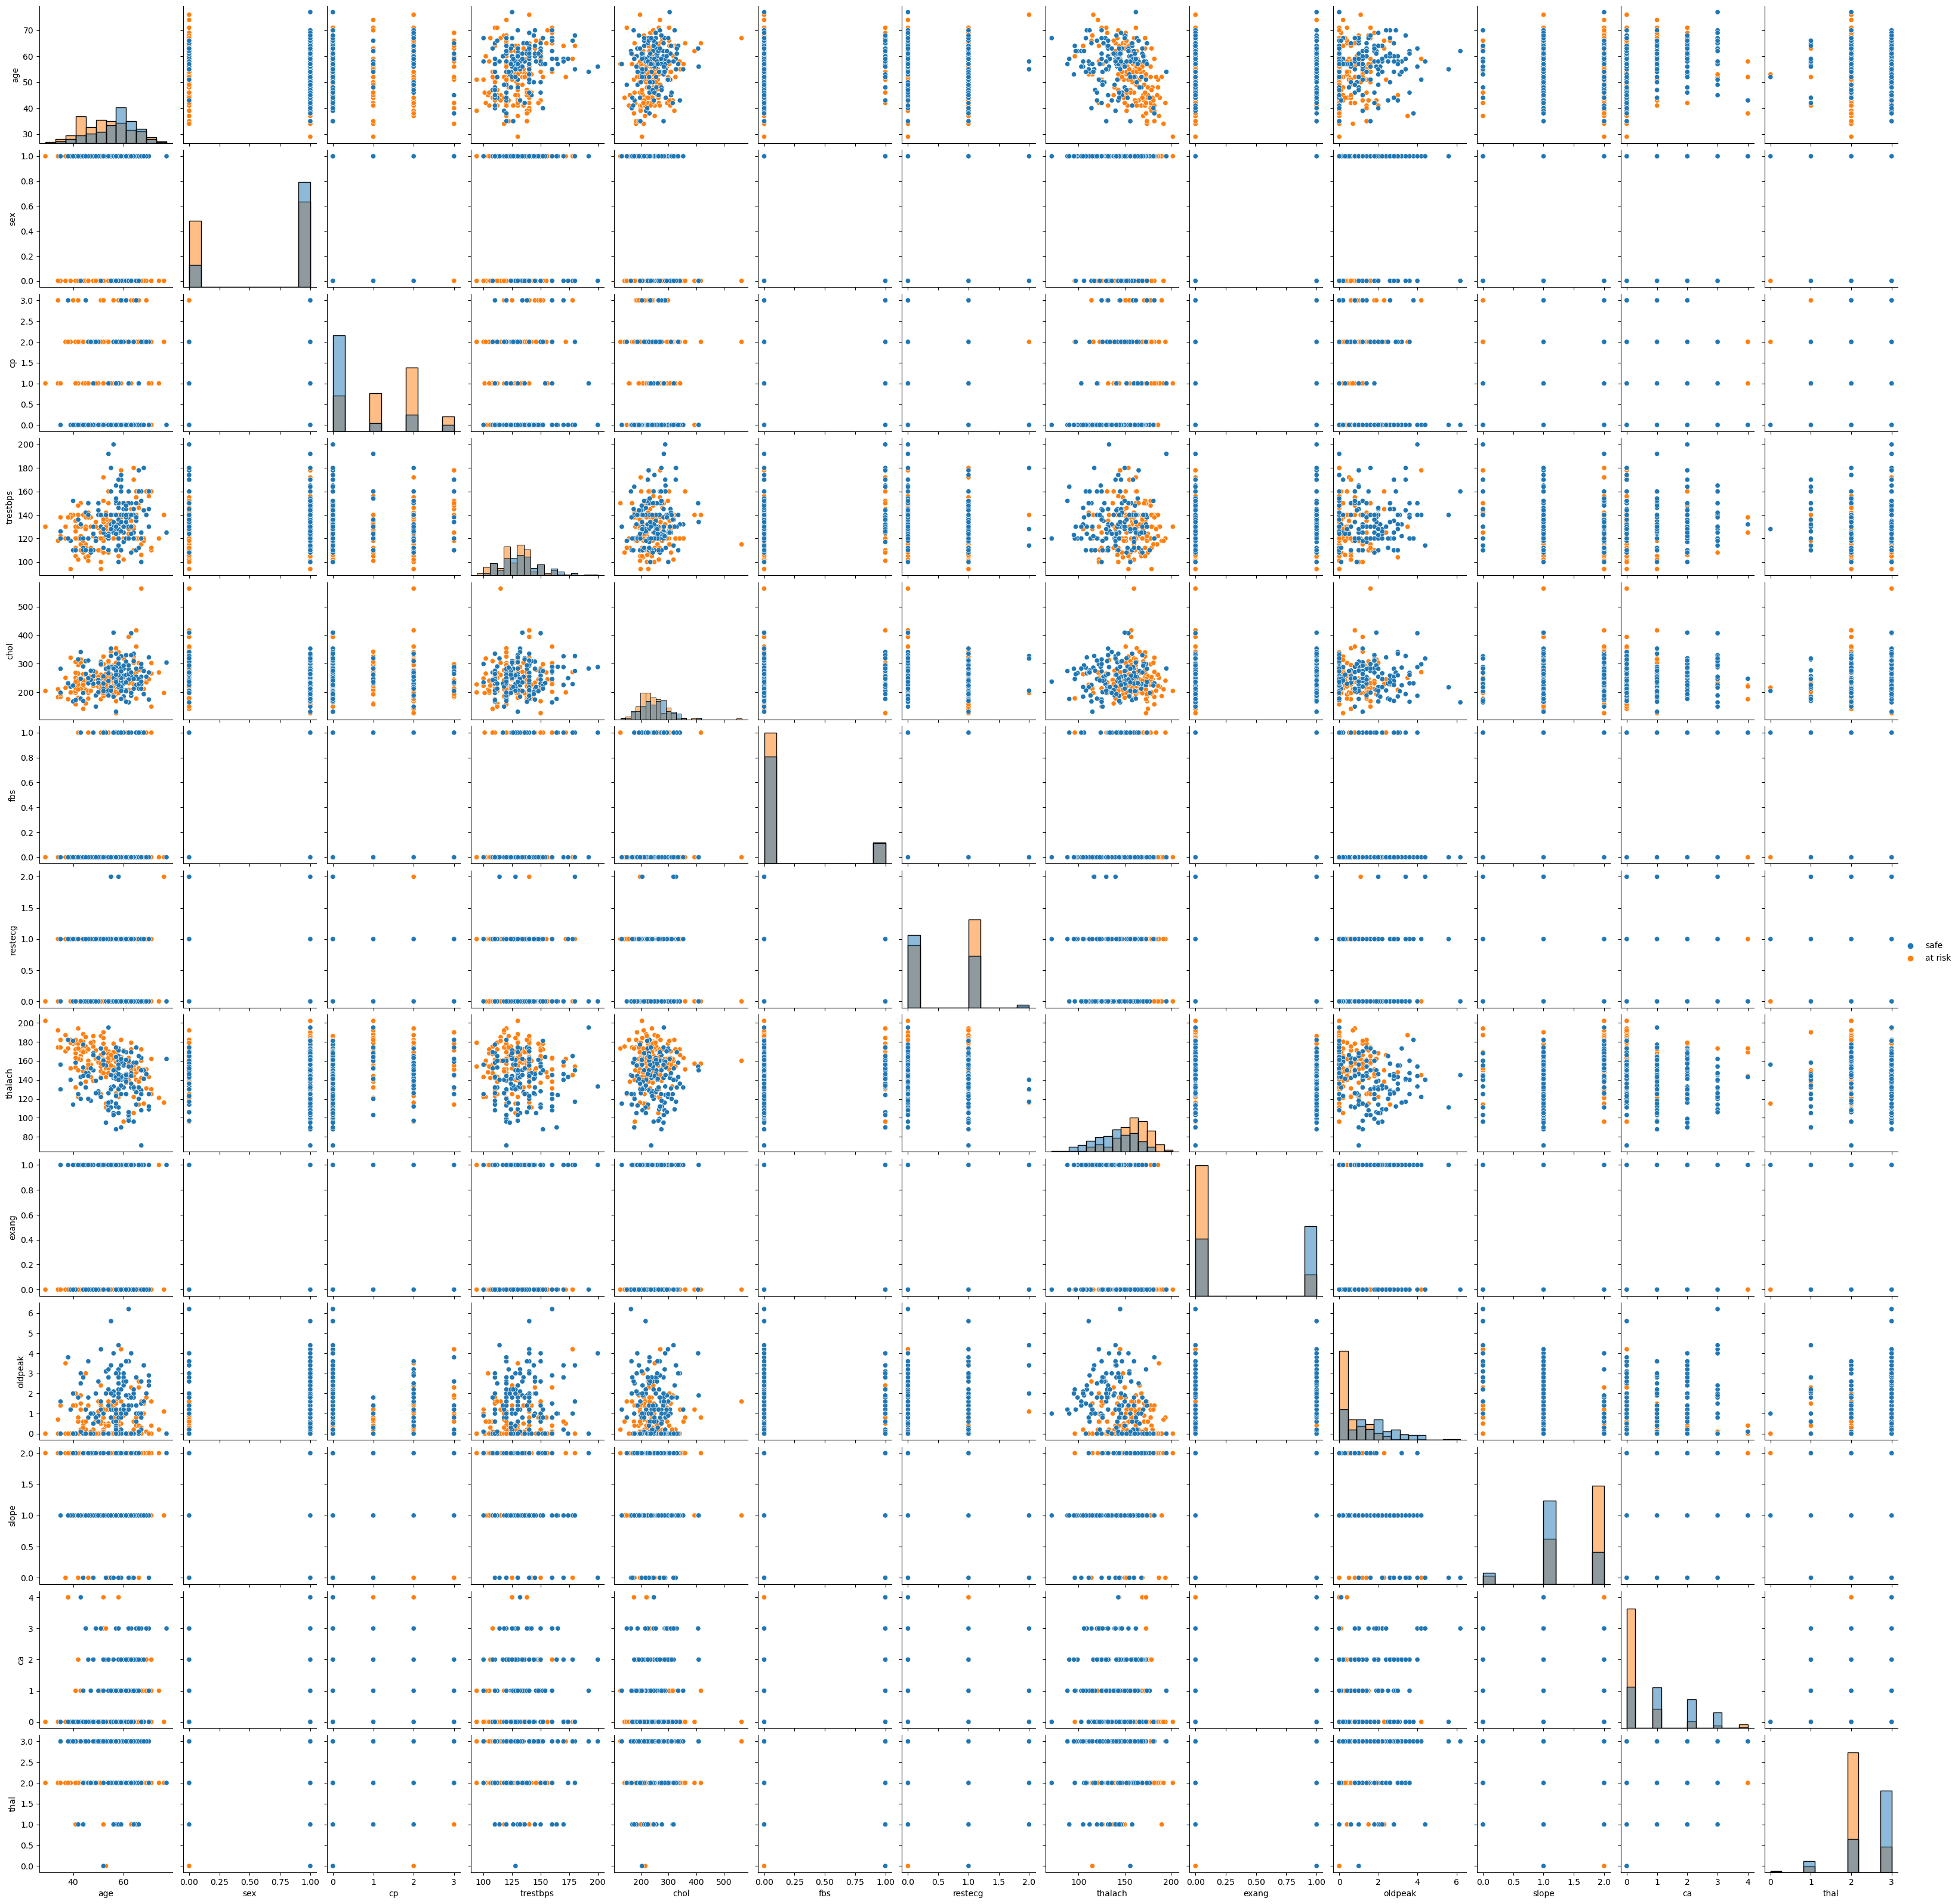

In [4]:
##TODO plot the  
plot = sns.pairplot(df, hue="target", diag_kind="hist", diag_kws = dict(alpha=.5) );
plot._legend.set_title('')
new_labels = ['safe', 'at risk']
for t, l in zip(plot._legend.texts, new_labels):
    t.set_text(l)

### XGboost

In this part you will build a classifier for the likelihood of having an heart attack using xgboost. You have to train, validate your classifier and print the most meaningful metrics.

In [41]:
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import DMatrix
import numpy as np

##TODO split the sample into a training, a test set and a validation set
# all columns up to the last one:
X = df.iloc[:, :-1]
# only the last column:
y = df.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=123)
eval_set = [(X_val, y_val)]

data_dmatrix = DMatrix(data=X,label=y)

In [42]:
##TODO train a classifier using early stopping and the logloss evaluation metric 
xgb_class = XGBClassifier(objective ='binary:logistic',
                          learning_rate = 0.1,
                          max_depth = 5, 
                          alpha = 10, 
                          n_estimators = 10)

xgb_class.fit(X_train,y_train, early_stopping_rounds=20, eval_set=eval_set, verbose=True)

[0]	validation_0-logloss:0.66785
[1]	validation_0-logloss:0.64245
[2]	validation_0-logloss:0.62056
[3]	validation_0-logloss:0.60277
[4]	validation_0-logloss:0.58657
[5]	validation_0-logloss:0.57342
[6]	validation_0-logloss:0.56033
[7]	validation_0-logloss:0.54801
[8]	validation_0-logloss:0.53834
[9]	validation_0-logloss:0.52810


/opt/homebrew/Caskroom/miniforge/base/envs/brj/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


XGBClassifier(alpha=10, base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=10, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=10, ...)

Accuracy score:  0.782608695652174


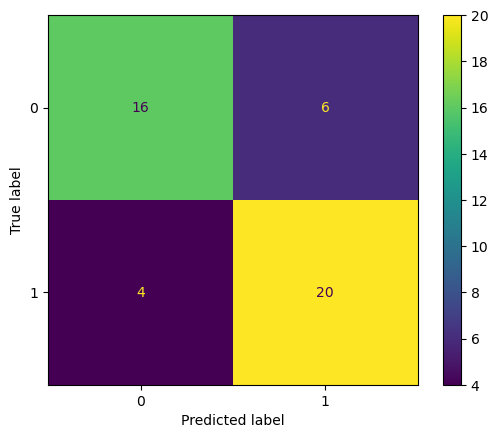

In [43]:
from sklearn.metrics import plot_confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score

##TODO plot the confusion metrics and calculate the accuracy score
y_pred = xgb_class.predict(X_test)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
print("Accuracy score: ", accuracy_score(y_test, y_pred))


**What can you say about the performance of your classifier based on these metrics?**

> The model can has a decent predictive power (accuracy of 0.78) but this seems insufficent for a medical setting. Quite worryngly the model as it is, is indifferent between false negative and false positive. In the context of hearth attack risk screening a false positve is cleary more benign than an undetected risk and should be valued accoredingly.

**Which metrics are better suited to evaluate this model? Calculate and visualize these metrics, and comment on the performance of the model.**

> I find of particualar interest the precision-recall plot for the following reason: our priority is to detect all the persons at risk of hearth attack (high recall), but without scaring too many health persons (high accuracy). These tradeoff can easily be read in such a plot, in our case a threshold of 0.47 seems the best choice since until there the recall cureve is relatively flat while the preciosion is linearly increasing.

In [44]:
from sklearn.metrics import (precision_score, recall_score, f1_score, precision_recall_curve,
                             balanced_accuracy_score, roc_curve, auc, roc_auc_score)

numerical_metrics = [precision_score, recall_score, f1_score, balanced_accuracy_score,  roc_auc_score]

for metric in numerical_metrics:
   print(metric.__name__, metric(y_test, y_pred)) 

precision_score 0.7692307692307693
recall_score 0.8333333333333334
f1_score 0.8
balanced_accuracy_score 0.7803030303030303
roc_auc_score 0.7803030303030304


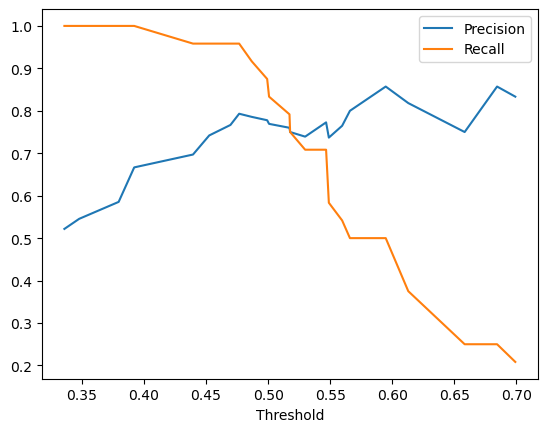

In [45]:
y_scores = xgb_class.predict_proba(X_test)[:,1]

curve_metric = [precision_recall_curve, auc, roc_curve]

precisions, recalls, thresholds = precision_recall_curve(y_test, y_scores)
plt.plot(thresholds, precisions[:-1], label="Precision")
plt.plot(thresholds, recalls[:-1], label="Recall")
plt.xlabel('Threshold')
plt.legend()

Text(0, 0.5, 'Precision')

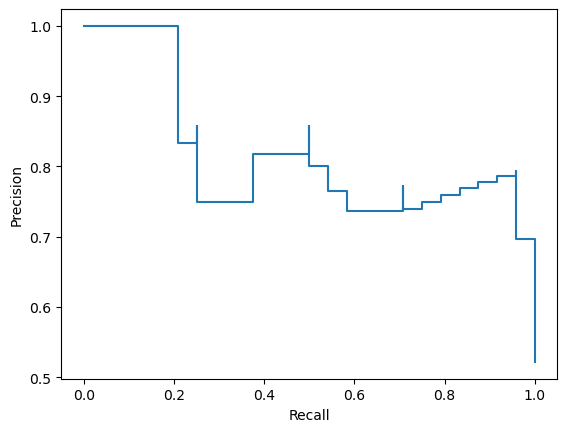

In [46]:
plt.step(recalls, precisions)
plt.xlabel('Recall')
plt.ylabel('Precision')

auc                  0.838


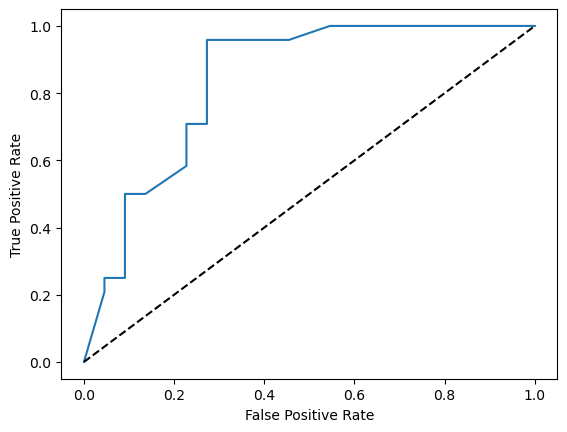

In [47]:
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
plt.plot(fpr, tpr)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
print("{:20s} {:.3f}".format("auc", roc_auc_score(y_test, y_scores)))

**OPTIONAL QUESTION: Suppose that the classifier you built performs very well, would you suggest using it to decide on the allocation of treatments to preent heart attacks?**

> If the certifictaion of our model is done correctly (high scores on the relevant metrics, calibrated prediction scores, bias checks, failsafes for out-of-distribution inputs / unexpected results, ...) I would use it for allocation of resurces when the model prediction confidence exceeds the averge perfomrance of human experts. A first period of supervision by human expert would neverthless be recomanded to ensure the well functioning of the system. 